# Mini Lab 1 - Bay Bridge Traffic Counts

This notebook contains traffic counts going westbound over the Bay bridge. The data comes from http://pems.dot.ca.gov/. This data can be useful for planning purposes and for incident detection.


First we need to import a few packages to process the data. Click in the box below and press "Shift"+"Enter" to run the code.

In [1]:
from datascience import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plots
import matplotlib.dates as mdates
plots.style.use('fivethirtyeight')
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Reading the data
Next, we read in a  file called pems_output.csv that has traffic counts by hour for each lane of the bay bridge for one week from 1/14/2016 to 1/21/2016. We will save the text from pems_output.csv into a table called data. Press "Shift"+"Enter" in the box below to run the code and see what the data table looks like.

In [2]:
data = Table.read_table('data/pems_output.csv')

data

Hour,Lane 1 Flow (Veh/Hour),Lane 2 Flow (Veh/Hour),Lane 3 Flow (Veh/Hour),Lane 4 Flow (Veh/Hour),Lane 5 Flow (Veh/Hour),Flow (Veh/Hour),# Lane Points,% Observed
1/14/2016 0:00,0,175,398,351,128,1052,60,60
1/14/2016 1:00,0,87,349,297,71,804,60,60
1/14/2016 2:00,0,101,361,314,117,893,60,60
1/14/2016 3:00,182,407,406,355,176,1526,60,60
1/14/2016 4:00,876,1094,727,645,488,3830,60,60
1/14/2016 5:00,1794,2007,1452,1265,1424,7942,60,60
1/14/2016 6:00,1677,2001,1513,1306,1534,8031,60,60
1/14/2016 7:00,1714,1992,1544,1347,1546,8143,60,60
1/14/2016 8:00,1558,1817,1465,1284,1452,7576,60,60
1/14/2016 9:00,1578,1775,1459,1274,1510,7596,60,60


## Plotting the data
If we want to plot the total traffic volume (on all lanes) over this week we would run the following. 
### First using the datascience plot function:

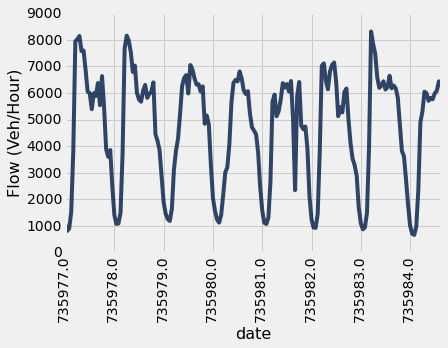

In [3]:
# Reminder the '#' indicates that this line is a comment.
# First, the column titled 'Hour' above needs to be interpreted as a datetime object.
data['date'] = pd.to_datetime(data['Hour'])

# the datascience package has a built in plot function - we can use this the data.select() function
# to choose the columns we want to plot. Then use the .plot() function to plot the data
data.select(['date','Flow (Veh/Hour)']).plot('date')


### Next using matplotlib - a python package that helps make custom plots
While the built-in data-science plot function is convenient, by default the date column prints in units of seconds, rather than printing 'mm/dd/yyyy'. We need to do a little bit of manipulation to process the date field correctly. The code below includes a little bit of custom code to clean up the x-axis

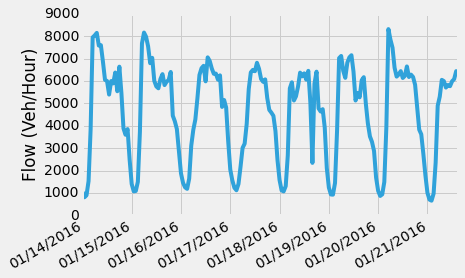

In [4]:
plots.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plots.gcf().autofmt_xdate()

plots.plot(data['date'],data['Flow (Veh/Hour)'])
plots.ylabel('Flow (Veh/Hour)')

## Seeing patterns

What patterns do you see in the traffic flow data above. Why do you think these patterns occur?

Can you recognize a difference between weekend days and weekdays? Note that a holiday (MLK day) also falls in this time period. 

In [ ]:
# write a response to the above questions here:




## Comparing the counts in different lanes
We can also compare traffic volumes in different lanes. Running the code below will show the traffic volumes in lane 1 and lane 2. Modify the code below to plot the traffic in each lane 1-5?

Which lanes have the highest traffic volumes. Which have the lowest traffic volumes?


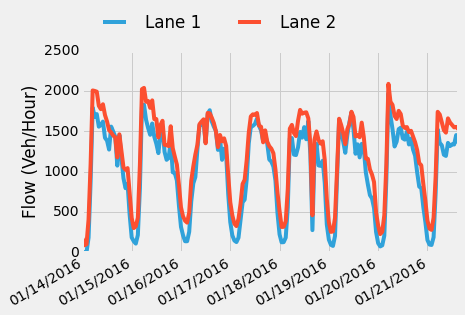

In [5]:
plots.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plots.gcf().autofmt_xdate()
plots.plot(data['date'],data['Lane 1 Flow (Veh/Hour)'],label='Lane 1')
plots.plot(data['date'],data['Lane 2 Flow (Veh/Hour)'],label='Lane 2')
# To add lane 3, copy and paste the above line. Change 'Lane 2 Flow (Veh/Hour)' 
# to 'Lane 3 Flow (Veh/Hour)'. Also change the label!



plots.ylabel('Flow (Veh/Hour)')
plots.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2)


In [ ]:
# Comment here on which lanes have the highest and lowest traffic volumes. Why do you think this might be?


## Visualizing the data in multiple ways.

We can choose different ways to display the data, for example we may want to look at the spread of traffic flows vs. hour of the day. In this case a scatter plot may be more helpful. Run the code below to see a scatter plot of veh/hour vs. time of day

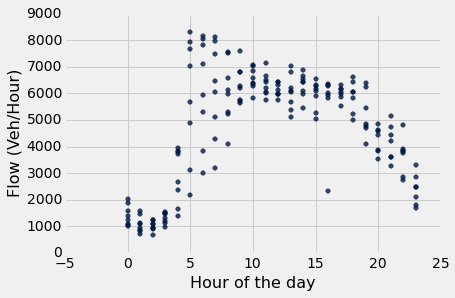

In [6]:
data['Hour of the day'] = pd.to_datetime(data['Hour']).hour
data.select(['Hour of the day','Flow (Veh/Hour)']).scatter('Hour of the day')


## Incident detection

Notice that there seems to be a bit of an outlier at 4pm on the scatter plot above. The same outlier can also be seen as the mysterious dip in traffic volume on January 18th in the plots above. What might cause a dip like this? 




In [ ]:
# Comment here on what might cause a dip in traffic like we see on 1/18



Why don't we do a little research and see if there is any news about incindents that occurred on 1/18 at about 4:00 that might limit traffic volumes on the bay bridge. After doing some research, do you now have a better idea of what cause the 1/18 dip in traffic volumes?

In [ ]:
# Answer here

Given what you discovered above, do you think that a local D.O.T. (department of transportation) could use traffic realtime traffic counts to identify traffic incidents?

In [ ]:
# Answer here

## Submitting this lab
On the top of this notebook click "File" --> "download as" --> "ipython notebook". This will download a copy of this .ipynb file on your computer. Submit this lab on bcourses. This lab will not be graded, but it will help you to become familiar with the submission process for this course. The lab will also help you with this week's homework!

In [ ]:
# this will give you the 10-19th row of the data table
data.rows[[range(10,20)]]

In [ ]:
# this will give all rows where the hour of data is = 0, 1, or 2
data.where(data['Hour of the day']<3)

In [ ]:
# first we create a day of month column, then we select all rows where day of month = 15
# and hour of day >12
data['day of month'] = data.apply(lambda x: x.day, 'date')
data.where(np.logical_and(data['day of month'] == 15, data['Hour of the day']>12))